___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!pip install contractions
!pip install autocorrect
!pip install nltk
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=ae4e537bd63e1693c5f98a64414fa946ce6b50bcf06414bdb7d16f04612b349d
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import contractions

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (12,5)
pd.set_option('display.max_columns', 50)


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [15]:
df = pd.read_csv('/content/drive/My Drive/Womens Clothing E-Commerce Reviews.csv')


In [16]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [17]:
df.shape

(23486, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended IND,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
Positive Feedback Count,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [20]:
df.describe(include="O")

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


In [21]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


### Data Wrangling

In [22]:
df.columns = df.columns.str.lower()

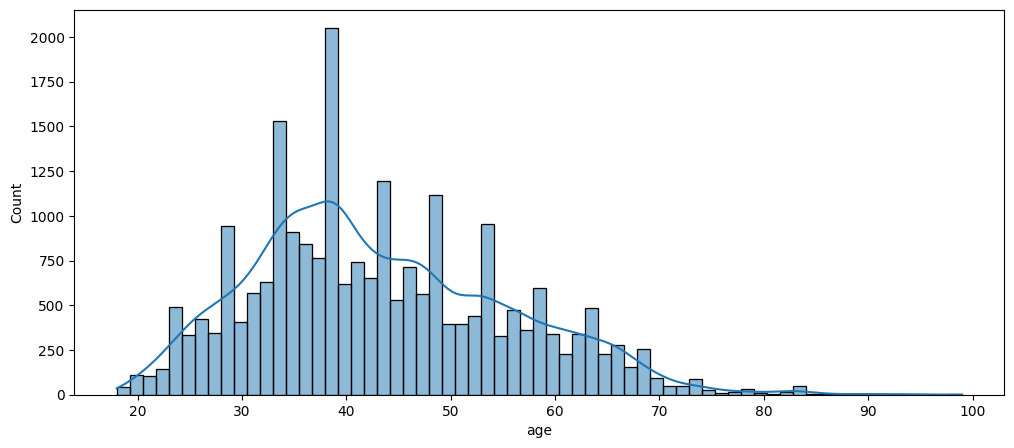

In [23]:
sns.histplot(data=df, x="age", kde=True)
plt.show()

In [24]:
df.groupby("recommended ind")["age"].mean()

,age
recommended ind,
0,42.389501
1,43.373304


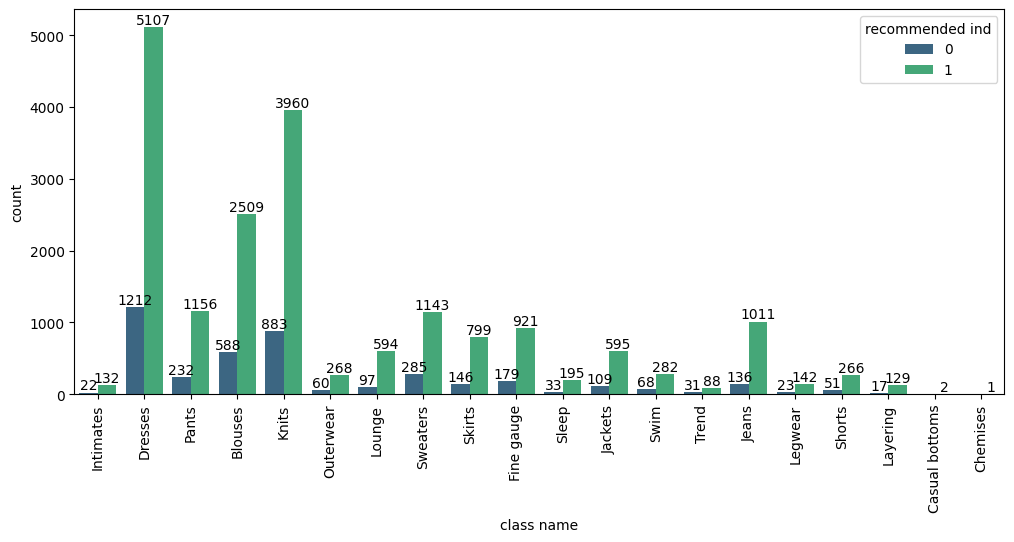

In [25]:
ax = sns.countplot(data = df,
                   x="class name",
                   hue="recommended ind",
                   palette="viridis")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

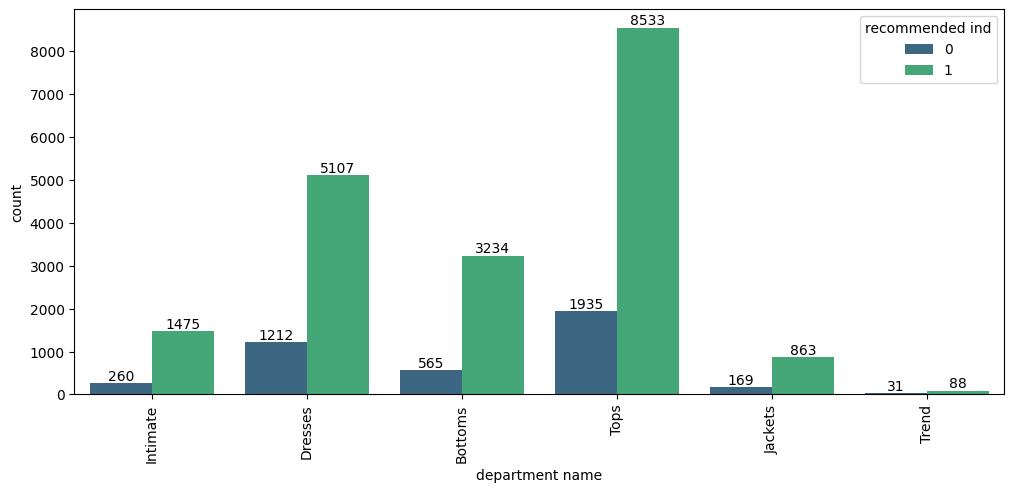

In [26]:
ax = sns.countplot(data = df,
                   x="department name",
                   hue="recommended ind",
                   palette="viridis")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

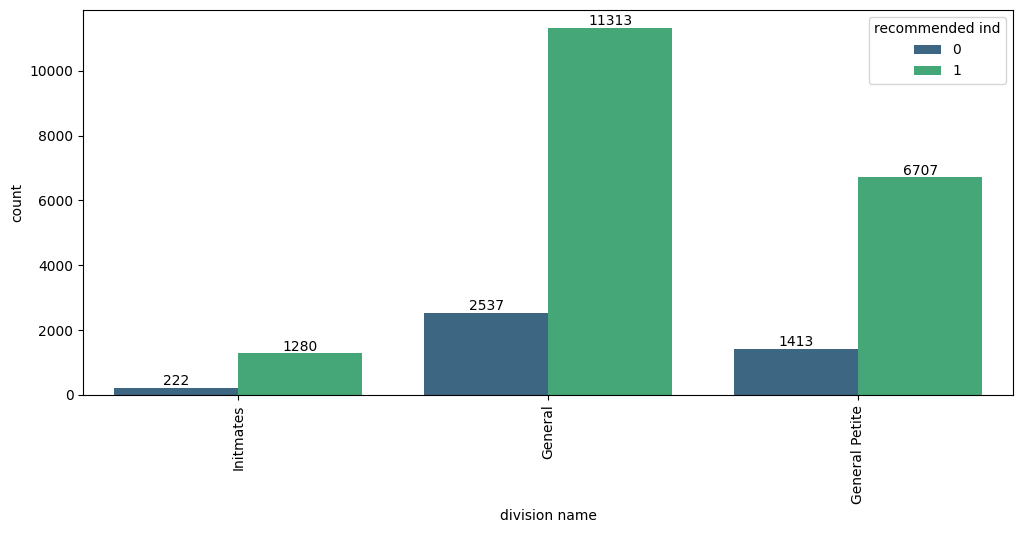

In [27]:
ax = sns.countplot(data = df,
                   x="division name",
                   hue="recommended ind",
                   palette="viridis")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

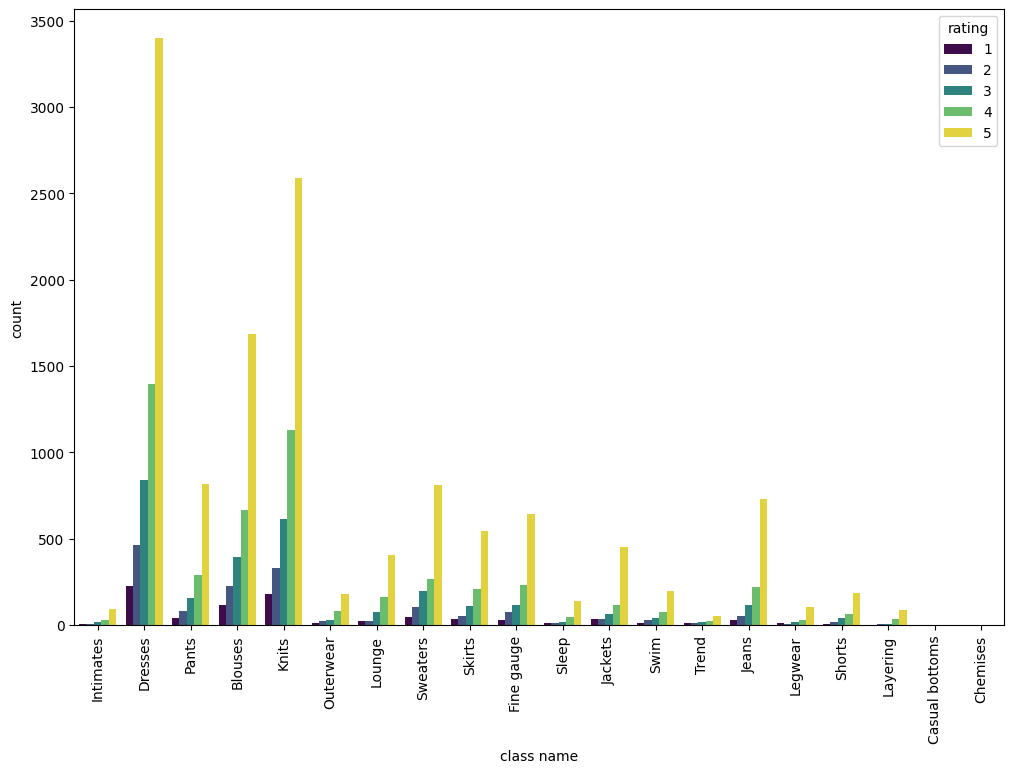

In [28]:
plt.figure(figsize=(12,8))

ax = sns.countplot(data = df,
                   x="class name",
                   hue="rating",
                   palette="viridis")
plt.xticks(rotation =90);

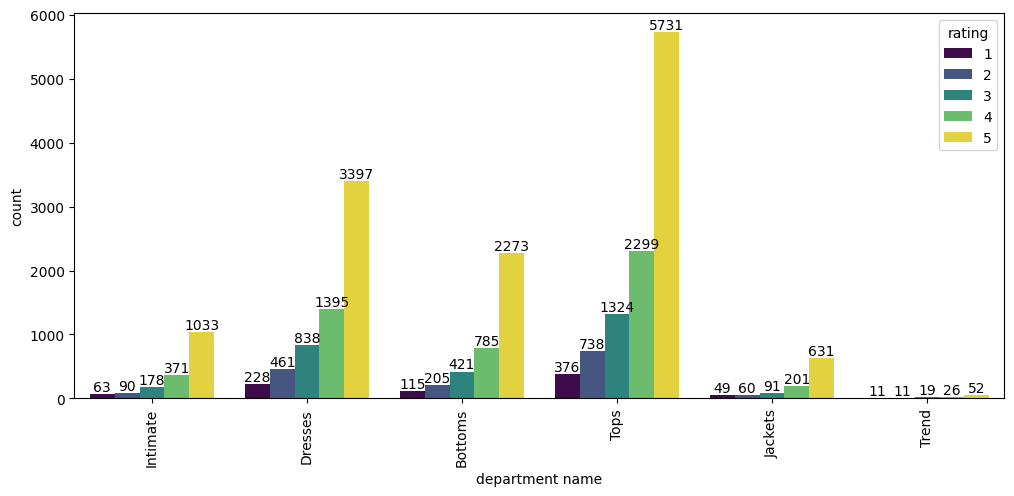

In [29]:
ax = sns.countplot(data = df,
                   x="department name",
                   hue="rating",
                   palette="viridis")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

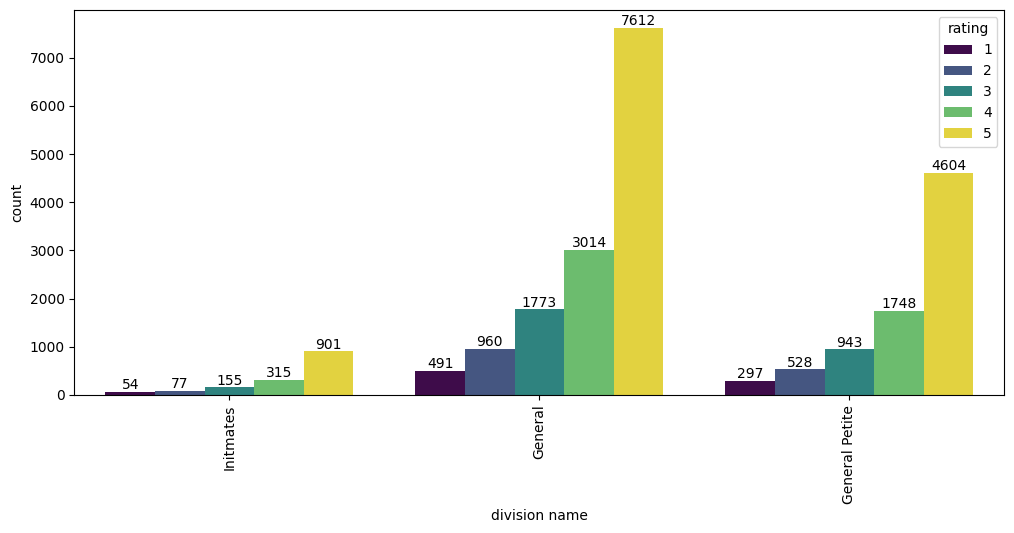

In [30]:
ax = sns.countplot(data = df,
                   x="division name",
                   hue="rating",
                   palette="viridis")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

In [31]:
df.groupby("class name")["positive feedback count"].mean()

,positive feedback count
class name,
Blouses,2.725218
Casual bottoms,0.000000
Chemises,0.000000
Dresses,3.087514
Fine gauge,2.013636
Intimates,0.779221
Jackets,2.826705
Jeans,1.759372
Knits,2.394797


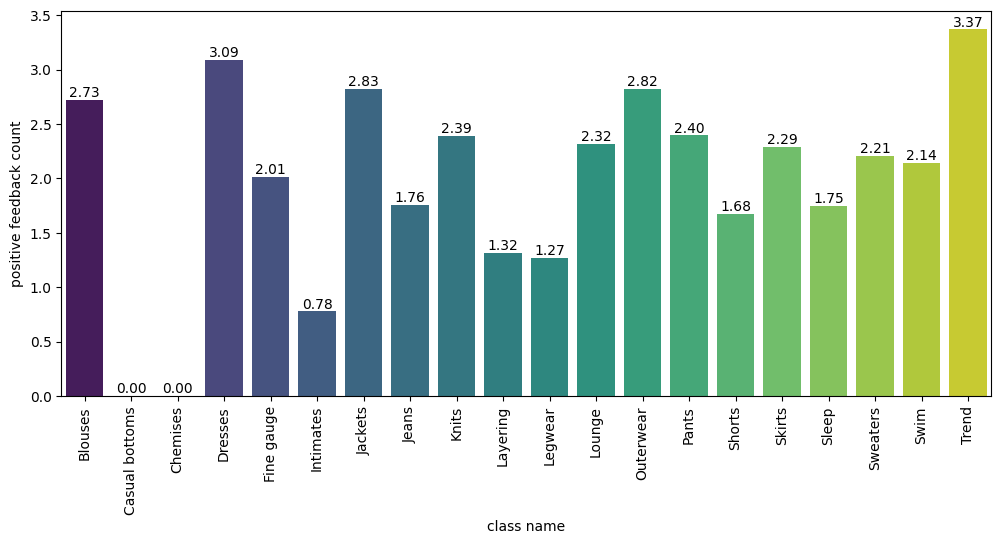

In [32]:
ax = sns.barplot(df.groupby("class name")["positive feedback count"].mean(), palette="viridis")

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f')
plt.xticks(rotation =90);

In [33]:
df.groupby("department name")["positive feedback count"].mean()

,positive feedback count
department name,
Bottoms,2.117136
Dresses,3.087514
Intimate,1.887608
Jackets,2.825581
Tops,2.427111
Trend,3.369748


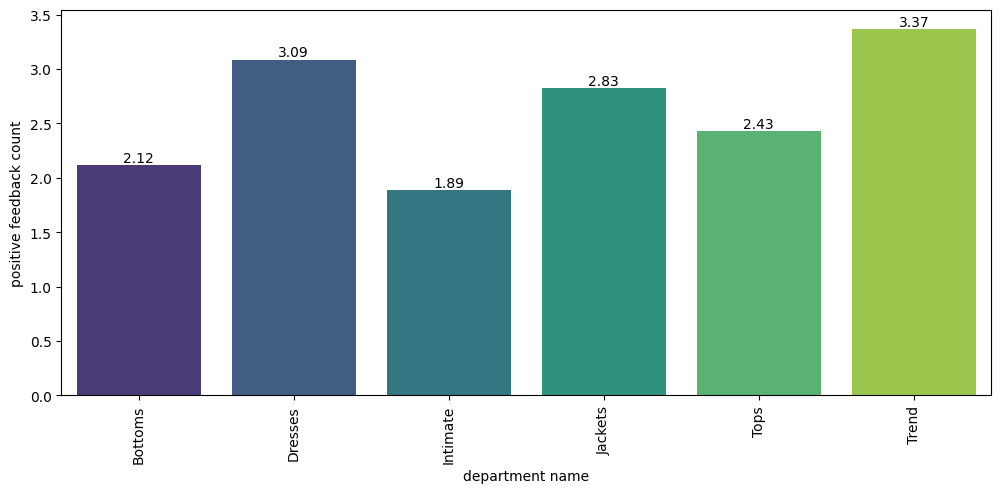

In [34]:
ax = sns.barplot(df.groupby("department name")["positive feedback count"].mean(), palette="viridis")

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f')
plt.xticks(rotation =90);

In [35]:
df.groupby("division name")["positive feedback count"].mean()

,positive feedback count
division name,
General,2.578845
General Petite,2.601601
Initmates,1.804261


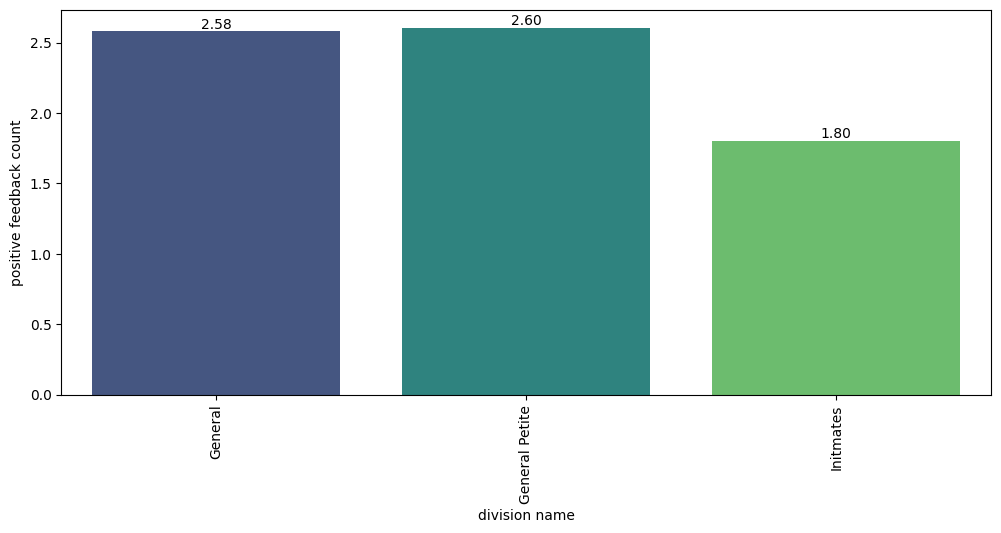

In [36]:
ax = sns.barplot(df.groupby("division name")["positive feedback count"].mean(), palette="viridis")

for p in ax.containers:
    ax.bar_label(p, fmt='%.2f')
plt.xticks(rotation =90);

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [37]:
df["recommended ind"].value_counts()   # 1 is recommended, 0 is not recommended

,count
recommended ind,
1,19314
0,4172


In [38]:
df["recommended ind"].value_counts(normalize=True)

,proportion
recommended ind,
1,0.822362
0,0.177638


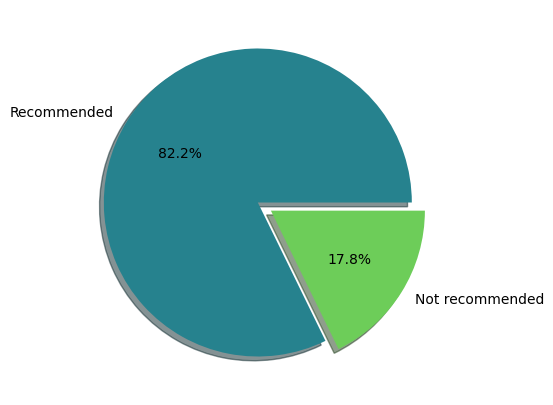

In [39]:
df["recommended ind"].value_counts().plot(kind="pie", shadow=True, explode=(0,0.1), autopct='%1.1f%%', labels=["Recommended","Not recommended"], colors=["#26828E", "#6DCD59"])
plt.ylabel("")
plt.show()

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [40]:
df2=df.copy()

In [41]:
df = df[["review text", "recommended ind"]]

In [42]:
df.rename(columns={"review text": "text", "recommended ind": "is_recommended"}, inplace=True)

In [43]:
df.head()

,text,is_recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [44]:
df.isnull().sum()

,0
text,845
is_recommended,0


In [45]:
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

,0
text,0
is_recommended,0


In [47]:
df.duplicated().sum()

7

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.duplicated().sum()

0

In [50]:
df.shape

(22634, 2)

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [51]:
stop_words = stopwords.words("english")

for i in ["not", "no"]:
  stop_words.remove(i)

In [52]:
def cleaning(data):


    # Contraction of text
    contraction_data=contractions.fix(data) #correction_data

    # Tokenize and lowercase
    text_tokens = word_tokenize(contraction_data.lower())

    # Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    # Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    # lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    # joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [53]:
df.is_recommended.value_counts()

,count
is_recommended,
1,18534
0,4100


In [54]:
positive= df[df["is_recommended"]==1]["text"]
positive

,text
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
6,I aded this in my basket at hte last mintue to...
...,...
23479,So i wasn't sure about ordering this skirt bec...
23481,I was very happy to snag this dress at such a ...
23482,"It reminds me of maternity clothes. soft, stre..."
23484,I bought this dress for a wedding i have this ...


In [55]:
negative = df[df["is_recommended"]==0]["text"]
negative

,text
2,I had such high hopes for this dress and reall...
5,"I love tracy reese dresses, but this one is no..."
10,Dress runs small esp where the zipper area run...
22,"First of all, this is not pullover styling. th..."
25,"Loved the material, but i didnt really look at..."
...,...
23449,I tried these on because the color is really p...
23450,I wanted to love this jacket. so soft and grea...
23460,I purchased this for a very good price and i t...
23478,I was surprised at the positive reviews for th...


### Collect Words (positive and negative separately)

In [56]:
positive_words = " ".join(positive)
negative_words = " ".join(negative)

In [57]:
positive_words[:1000]

'Absolutely wonderful - silky and sexy and comfortable Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite. I love, love, love this jumpsuit. it\'s fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments! This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!! I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet 

In [58]:
negative_words[:1000]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress. Dress run

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [59]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 3.2 MB/s eta 0:00:00


In [60]:
from wordcloud import WordCloud

In [61]:
worldcloud_positive = WordCloud(background_color="white", max_words =250)

# creates an image of the top 250 most frequently mentioned tokens in the corpus with a white background color

In [62]:
worldcloud_positive.generate(positive_words)

# With the generate command, the first 250 most frequently mentioned tokens in our data are determined according to the instructions we have given above

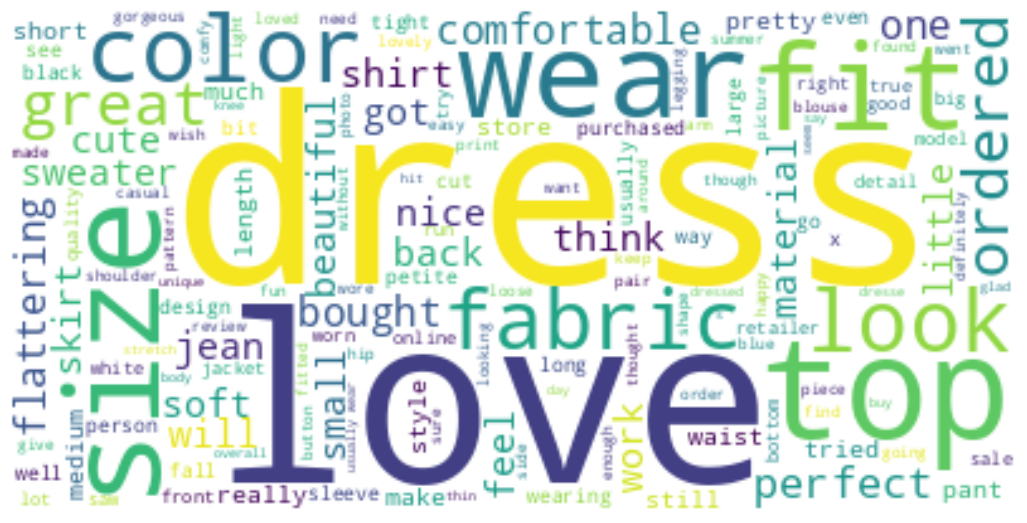

In [63]:
plt.figure(figsize = (13,13))                            # matplotlib library is used for visualization.
plt.imshow(worldcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

In [64]:
worldcloud_negative = WordCloud(background_color="white", max_words =250)

# creates an image of the top 250 most frequently mentioned tokens in the corpus with a white background color

In [65]:
worldcloud_negative.generate(negative_words)

# With the generate command, the first 250 most frequently mentioned tokens in our data are determined according to the instructions we have given above

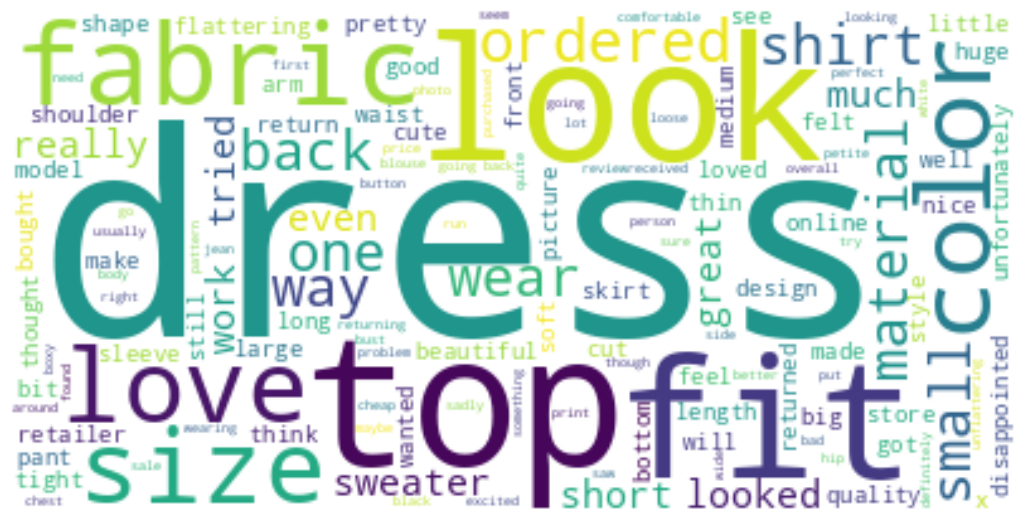

In [66]:
plt.figure(figsize = (13,13))                    # matplotlib library is used for visualization
plt.imshow(worldcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = df["text"].values
y = df["is_recommended"].map({1:0, 0:1}).values     # our target class is "not recommended"

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)   # min_df = 3 --> ignore tokens that occur in less than 3 documents (comments) in my corpus.
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# By giving the cleaning function we defined above to the preprocessor hyper-parameter,
# we can perform the cleaning operation within the CountVectorizer transformation algorithm.

In [72]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
pd.DataFrame(X_train_count.toarray(),
             columns=vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yellow,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youthful,yr,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18104,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)  # min_df = 3 --> ignore tokens that occur in less than 3 documents (comments) in my corpus.
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# by giving the preprocessor hyper-parameter the cleaning function we defined above,
# we can perform the cleaning operation within the TfidfVectorizer transformation algorithm.

In [78]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yellow,yep,yes,yesterday,yet,yikes,yo,yoga,yoke,york,young,younger,youthful,yr,yucky,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.119691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [80]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [81]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [82]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C = 0.01, class_weight='balanced', max_iter=1000)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000)

In [83]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3126  581]
 [ 127  693]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3707
           1       0.54      0.85      0.66       820

    accuracy                           0.84      4527
   macro avg       0.75      0.84      0.78      4527
weighted avg       0.89      0.84      0.86      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14827
           1       0.57      0.88      0.69      3280

    accuracy                           0.86     18107
   macro avg       0.77      0.87      0.80     18107
weighted avg       0.90      0.86      0.87     18107



In [84]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, average_precision_score

model = LogisticRegression(C = 0.01,  class_weight='balanced', max_iter=1000)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.550832
train_precision,0.570762
test_recall,0.846341
train_recall,0.882520
test_f1,0.667095
train_f1,0.693199
test_accuracy,0.846799
train_accuracy,0.858489


In [85]:
#!pip install -qU scikit-plot
# !pip install scikit-plot

In [86]:
!pip install -q mljar-scikit-plot

  Preparing metadata (setup.py) ... done


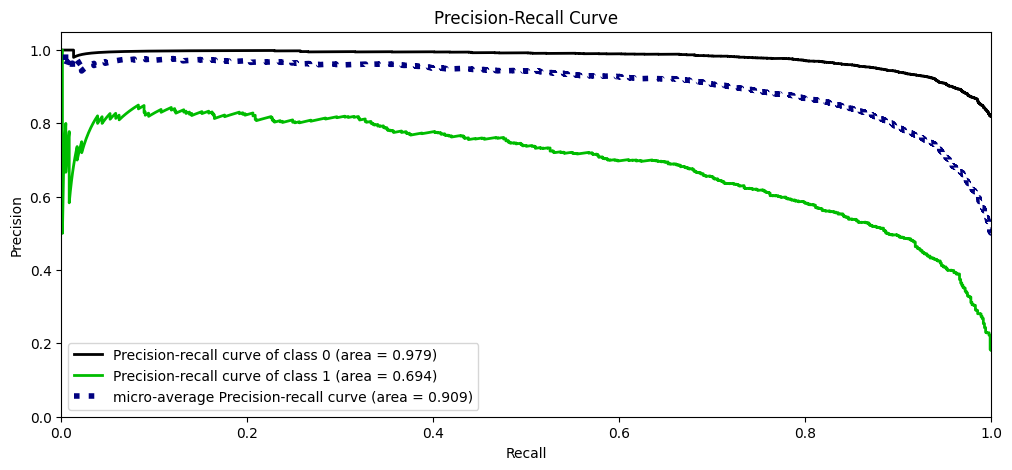

In [87]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.01,  class_weight='balanced', max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [88]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test, y_pred)
log_count_AP = average_precision_score(y_test, y_pred_proba)

### TF-IDF

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
log = LogisticRegression(C=0.5,  class_weight='balanced', max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000)

In [91]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3198  509]
 [ 121  699]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3707
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4527
   macro avg       0.77      0.86      0.80      4527
weighted avg       0.89      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14827
           1       0.62      0.92      0.74      3280

    accuracy                           0.88     18107
   macro avg       0.80      0.90      0.83     18107
weighted avg       0.91      0.88      0.89     18107



In [92]:
model = LogisticRegression(C=0.5, max_iter=1000, class_weight="balanced")

scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.580145
train_precision,0.619285
test_recall,0.856707
train_recall,0.919648
test_f1,0.691564
train_f1,0.740153
test_accuracy,0.861435
train_accuracy,0.883029


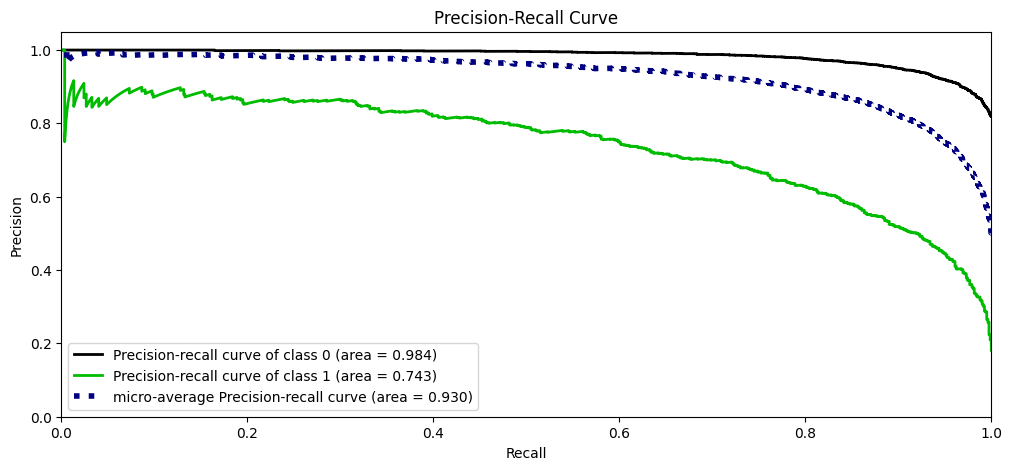

In [93]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.5, max_iter=1000, class_weight="balanced")

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [94]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]

log_tfidf_AP = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [95]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [96]:
nb = BernoulliNB(alpha=1, fit_prior = False)
nb.fit(X_train_count,y_train)

# fit_prior determines whether class priorities are learned.
# When set to True, class priorities are learned from the dataset. When set to False, all classes are given equal priority.

BernoulliNB(alpha=1, fit_prior=False)

In [97]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3184  523]
 [ 130  690]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3707
           1       0.57      0.84      0.68       820

    accuracy                           0.86      4527
   macro avg       0.76      0.85      0.79      4527
weighted avg       0.89      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14827
           1       0.61      0.88      0.72      3280

    accuracy                           0.87     18107
   macro avg       0.79      0.88      0.82     18107
weighted avg       0.91      0.87      0.88     18107



In [98]:
model = BernoulliNB(alpha=1, fit_prior = False)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.568708
train_precision,0.611269
test_recall,0.835061
train_recall,0.882690
test_f1,0.676441
train_f1,0.722321
test_accuracy,0.855249
train_accuracy,0.877064


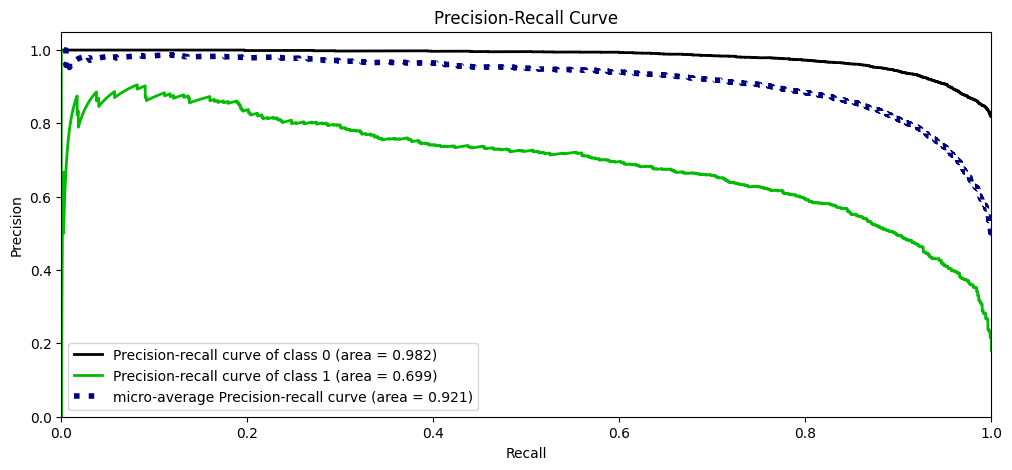

In [99]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = BernoulliNB(alpha=1, fit_prior = False)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [100]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_count_AP = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [101]:
nb = BernoulliNB(alpha=1, fit_prior = False)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=1, fit_prior=False)

In [102]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3184  523]
 [ 130  690]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3707
           1       0.57      0.84      0.68       820

    accuracy                           0.86      4527
   macro avg       0.76      0.85      0.79      4527
weighted avg       0.89      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14827
           1       0.61      0.88      0.72      3280

    accuracy                           0.87     18107
   macro avg       0.79      0.88      0.82     18107
weighted avg       0.91      0.87      0.88     18107



In [103]:
model = BernoulliNB(alpha=1, fit_prior = False)

scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.568708
train_precision,0.611269
test_recall,0.835061
train_recall,0.882690
test_f1,0.676441
train_f1,0.722321
test_accuracy,0.855249
train_accuracy,0.877064


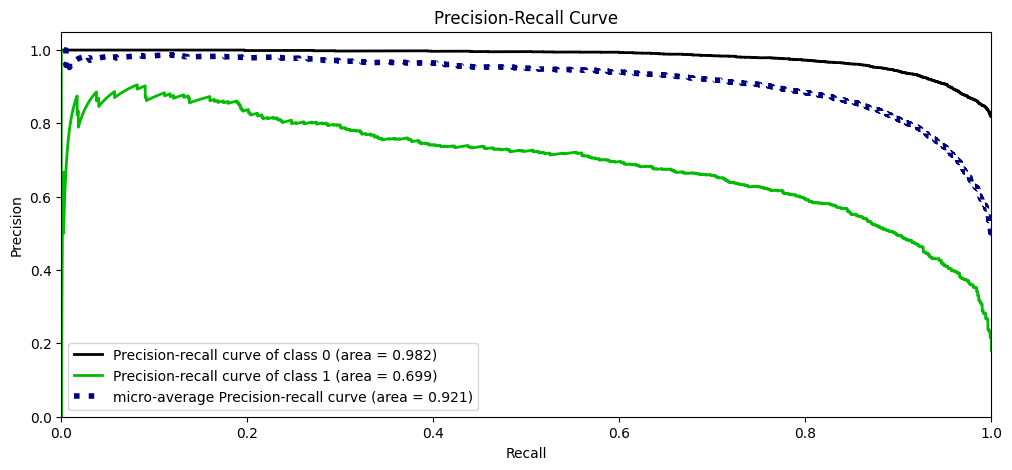

In [104]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = BernoulliNB(alpha=1, fit_prior = False)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [105]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_tfidf_AP = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [106]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.002, class_weight="balanced", random_state=42)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.002, class_weight='balanced', random_state=42)

In [107]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3164  543]
 [ 126  694]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3707
           1       0.56      0.85      0.67       820

    accuracy                           0.85      4527
   macro avg       0.76      0.85      0.79      4527
weighted avg       0.89      0.85      0.86      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.92     14827
           1       0.59      0.90      0.71      3280

    accuracy                           0.87     18107
   macro avg       0.78      0.88      0.82     18107
weighted avg       0.91      0.87      0.88     18107



In [108]:
model = LinearSVC(C=0.002, class_weight = 'balanced', random_state = 42)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.564021
train_precision,0.594824
test_recall,0.848780
train_recall,0.899424
test_f1,0.677442
train_f1,0.716077
test_accuracy,0.853427
train_accuracy,0.870799


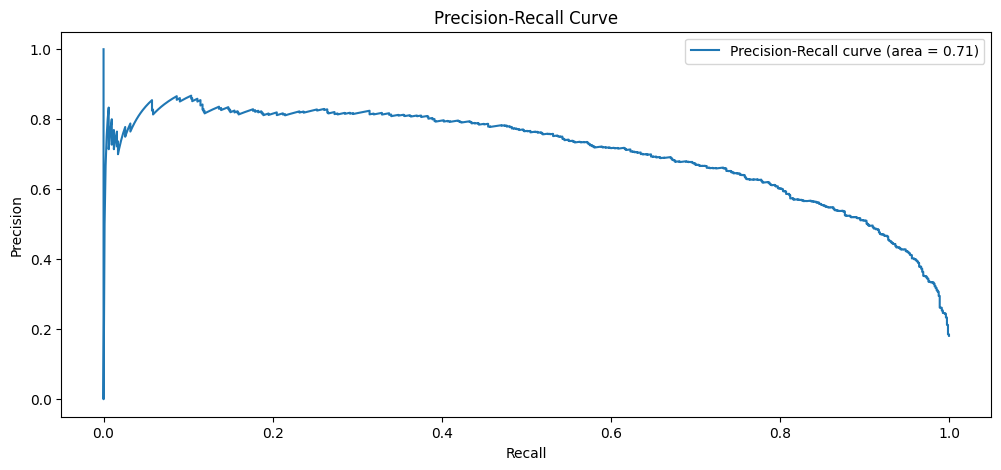

In [109]:
from sklearn.metrics import precision_recall_curve, average_precision_score

model = LinearSVC(C=0.002, class_weight = 'balanced', random_state = 42)

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)

# Calculate Precision and Recall values
precision, recall, thresholds = precision_recall_curve(y_test, decision_function)

# average precision
average_precision = average_precision_score(y_test, decision_function)

# Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [110]:
decision_function

array([-1.70508393, -0.38508577, -0.74721329, ...,  0.96227175,
       -2.47161969,  0.52546375])

In [111]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_count_AP = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [112]:
svc = LinearSVC(C=0.1, class_weight = 'balanced', random_state = 42)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced', random_state=42)

In [113]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3215  492]
 [ 127  693]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3707
           1       0.58      0.85      0.69       820

    accuracy                           0.86      4527
   macro avg       0.77      0.86      0.80      4527
weighted avg       0.89      0.86      0.87      4527

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14827
           1       0.64      0.93      0.76      3280

    accuracy                           0.89     18107
   macro avg       0.81      0.91      0.85     18107
weighted avg       0.92      0.89      0.90     18107



In [114]:
model = LinearSVC(C=0.1, class_weight = 'balanced', random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.589406
train_precision,0.642580
test_recall,0.853963
train_recall,0.933672
test_f1,0.697147
train_f1,0.761246
test_accuracy,0.865467
train_accuracy,0.893908


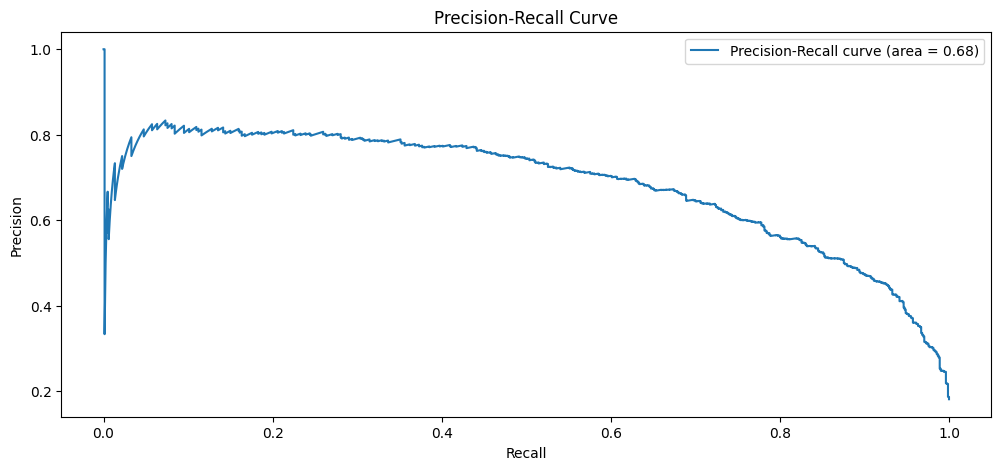

In [115]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.1, class_weight="balanced", random_state=42)

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_count)

# Calculate Precision and Recall values
precision, recall, thresholds = precision_recall_curve(y_test, decision_function)

# average precision
average_precision = average_precision_score(y_test, decision_function)

# Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [116]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_tfidf_AP = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [117]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=6, class_weight="balanced", random_state = 42, n_jobs = -1)
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [118]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3107  600]
 [ 140  680]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      3707
           1       0.53      0.83      0.65       820

    accuracy                           0.84      4527
   macro avg       0.74      0.83      0.77      4527
weighted avg       0.88      0.84      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14827
           1       0.55      0.87      0.67      3280

    accuracy                           0.85     18107
   macro avg       0.76      0.85      0.79     18107
weighted avg       0.89      0.85      0.86     18107



In [119]:
model = RandomForestClassifier(n_estimators=300, max_depth=6, class_weight="balanced", random_state = 42, n_jobs = -1)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.522013
train_precision,0.552433
test_recall,0.821951
train_recall,0.863753
test_f1,0.638377
train_f1,0.673854
test_accuracy,0.831225
train_accuracy,0.848530


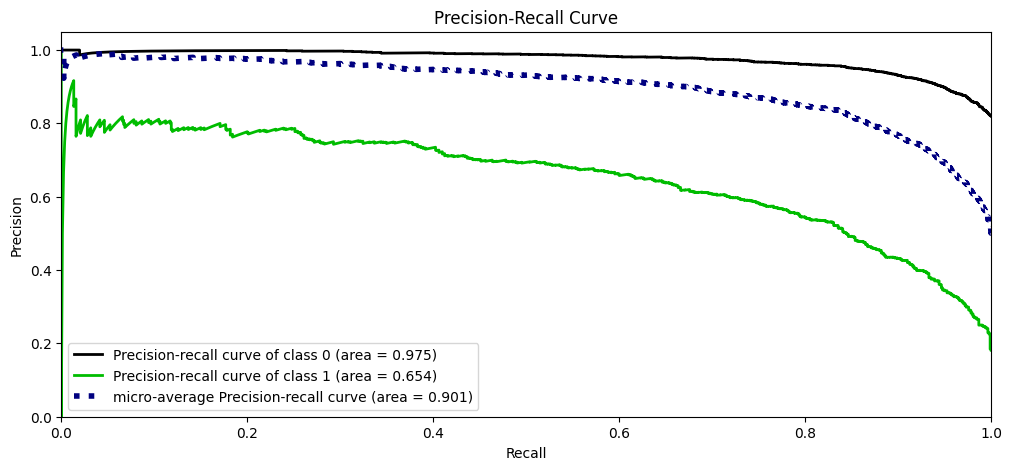

In [120]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(n_estimators=300, max_depth=6, class_weight="balanced", random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [121]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_count_AP = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [122]:
rf = RandomForestClassifier(n_estimators=300, max_depth=3, class_weight="balanced", random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [123]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3031  676]
 [ 146  674]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      3707
           1       0.50      0.82      0.62       820

    accuracy                           0.82      4527
   macro avg       0.73      0.82      0.75      4527
weighted avg       0.87      0.82      0.83      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     14827
           1       0.52      0.87      0.65      3280

    accuracy                           0.83     18107
   macro avg       0.74      0.84      0.77     18107
weighted avg       0.88      0.83      0.84     18107



In [124]:
model = RandomForestClassifier(n_estimators=300, max_depth=3, class_weight="balanced", random_state = 42, n_jobs = -1)

scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.498112
train_precision,0.520366
test_recall,0.820122
train_recall,0.855318
test_f1,0.619582
train_f1,0.647011
test_accuracy,0.817473
train_accuracy,0.830906


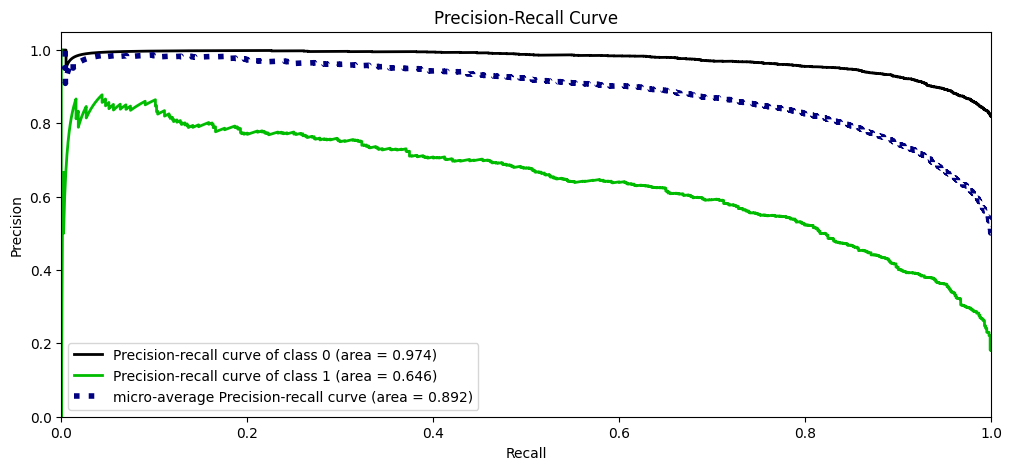

In [125]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(n_estimators=300, max_depth=3, class_weight="balanced", random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [126]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_tfidf_AP = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [127]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

ada = AdaBoostClassifier(n_estimators= 200, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

ada.fit(X_train_count, y_train, sample_weight = class_weights[y_train])

AdaBoostClassifier(n_estimators=200, random_state=42)

In [128]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3151  556]
 [ 157  663]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3707
           1       0.54      0.81      0.65       820

    accuracy                           0.84      4527
   macro avg       0.75      0.83      0.77      4527
weighted avg       0.88      0.84      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     14827
           1       0.58      0.85      0.69      3280

    accuracy                           0.86     18107
   macro avg       0.77      0.86      0.80     18107
weighted avg       0.89      0.86      0.87     18107



In [129]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

scores = cross_validate(model, X_train_count, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        fit_params =  {"sample_weight" : class_weights[y_train]},
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.555436
train_precision,0.581994
test_recall,0.796037
train_recall,0.848984
test_f1,0.654127
train_f1,0.690574
test_accuracy,0.847463
train_accuracy,0.862177


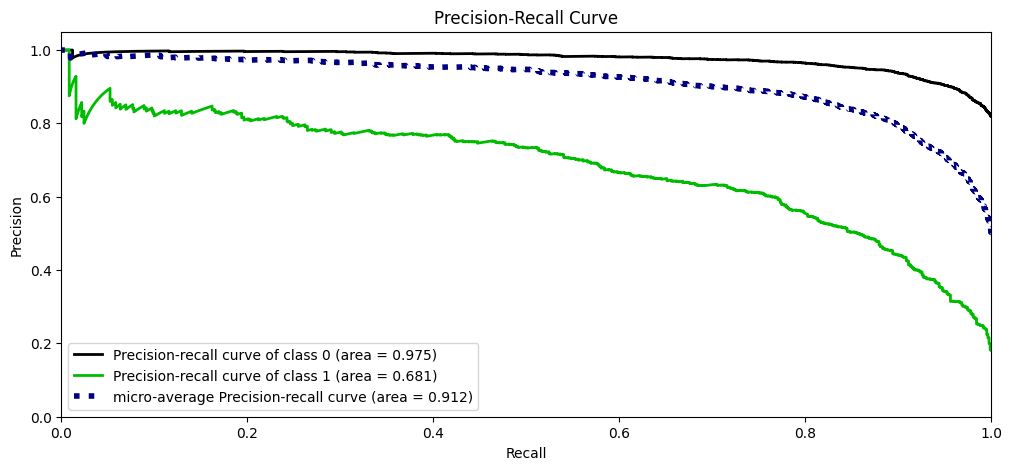

In [130]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 200, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model.fit(X_train_count, y_train, sample_weight = class_weights[y_train])

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [131]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_count_AP = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [132]:
ada = AdaBoostClassifier(n_estimators = 200, learning_rate=0.5, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

ada.fit(X_train_tf_idf, y_train, sample_weight=class_weights[y_train])

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=42)

In [133]:
print("TF - IDF Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

TF - IDF Ada MODEL
[[3088  619]
 [ 136  684]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3707
           1       0.52      0.83      0.64       820

    accuracy                           0.83      4527
   macro avg       0.74      0.83      0.77      4527
weighted avg       0.88      0.83      0.85      4527

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14827
           1       0.56      0.88      0.69      3280

    accuracy                           0.85     18107
   macro avg       0.77      0.86      0.80     18107
weighted avg       0.90      0.85      0.87     18107



In [134]:
model = AdaBoostClassifier(n_estimators = 200, learning_rate=0.5, random_state = 42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

scores = cross_validate(model, X_train_tf_idf, y_train,
                        scoring = ['precision','recall','f1','accuracy'],
                        cv = 10,
                        fit_params =  {"sample_weight" : class_weights[y_train]},
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

,0
test_precision,0.534942
train_precision,0.567997
test_recall,0.822866
train_recall,0.882385
test_f1,0.648162
train_f1,0.691111
test_accuracy,0.838074
train_accuracy,0.857115


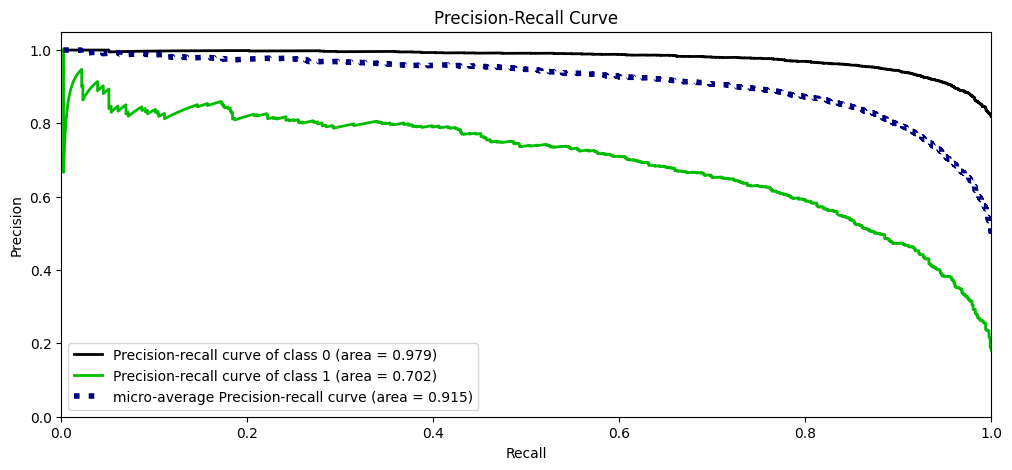

In [135]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators = 200, random_state = 42, learning_rate = 0.5)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

model.fit(X_train_count, y_train, sample_weight = class_weights[y_train])

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [136]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_tfidf_AP = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [137]:
X = df["text"].values
y = df["is_recommended"].map({1:0, 0:1}).values

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [139]:
num_words = 15001 # 1 fazlasını yazıyoruz.

tokenizer = Tokenizer(num_words=num_words)  #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890'

# The tokenizer function splits all text into word tokens.
# The num_words hyperparameter indicates that when converting the tokens to numeric version, the first 15,000 words (tokens) that occur in the train data/corpus
# will be converted to numeric version and the other tokens will be ignored.

# filters hyper_parameter allows us to set the cleaning operations to be performed.
# If we also want to clean numbers, we can include numbers in the filters hyper_parameter.

In [140]:
tokenizer.fit_on_texts(X_train)

# fit_on_texts first breaks down the texts in the train data/corpus into tokens and then identifies all unique tokens and numbers them according to their frequency of use.
# The most frequently used token is given the number 1.
# Since we have defined num_words= 15001, tokens with numbers between 1 and 15000 will be used in the conversion phase and the others will be ignored.
# To see the ranking of the frequency of use of these tokens, we will need to use the word_index function as below.

### Creating word index

In [141]:
tokenizer.word_index

# word_index sorts the tokens in the train data/corpus according to their frequency of use.

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'me': 30,
 'as': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'really': 50,
 'more': 51,
 'ordered': 52,
 'perfect': 53,
 'little': 54,
 'one': 55,
 'these': 56,
 'will': 57,
 'flattering': 58,
 'an': 59,
 'well': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 'cute': 67,
 'comfortable': 68,
 'nice': 69,
 'bought': 70,
 'than': 71,
 'beautiful': 72,
 'when': 73,
 'all': 74,
 'looks': 75,
 'bit': 76,
 'large': 77,
 'fits': 78,
 'shirt': 

In [142]:
len(tokenizer.word_index)

# There are a total of 13507 unique tokens in our train data/corpus.

14099

### Converting tokens to numeric

In [143]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)  # Converted to numeric version according to unique tokens in X_train
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)    # converted to numeric version according to unique tokens in X_train to avoid data leakage

# texts_to_sequences function to find all tokens in each document/line of our data and their frequency of use in word_index of train data
# (num_words=15001 so only the first 15000 most frequently used tokens will be used).

# Example: "this dress is very nice i recommend it" comment is converted to the following vector
# --> this: 7, dress: 18, is: 6, very: 23, nice: 70, i: 2, recommend: 206, it: 5  -->  [7, 18, 6, 23, 70, 2, 206, 5].
# Note that these conversions are based on the top 15,000 most frequent tokens in the corpus.
# If the "recommend" token was the 15,001st or higher token, the "recommend" token would be ignored during the transformation and
# the resulting vector would be [7, 18, 6, 23, 70, 2, 5].

In [144]:
len(X_train_num_tokens)

20370

In [145]:
X_test[:2]

array(["Wore my new red cardigan for the first time today to work. fit is tts. this is a true red and not neon or orange tinted. it wraps nicely in front and has a nice flair at the hips.. i also like the detail in the knit. i like to push my sleeves up and love the fact that they don't slide down my arms all day. i'll wear this cardigan a lot.",
       'This will be a frequently worn item. print is beautiful and the fit is comfy and classy.'],
      dtype=object)

In [146]:
np.array(X_test_num_tokens[:2], dtype="object")
# we see the numeric vectors of the first two comments.

array([list([219, 17, 447, 263, 397, 12, 1, 170, 182, 435, 8, 102, 26, 6, 326, 7, 6, 4, 130, 263, 3, 19, 2665, 37, 485, 12695, 5, 2856, 258, 9, 155, 3, 88, 4, 69, 1366, 44, 1, 236, 2, 86, 28, 1, 256, 9, 1, 385, 2, 28, 8, 2312, 17, 135, 43, 3, 21, 1, 658, 20, 42, 125, 2579, 80, 17, 191, 74, 260, 422, 32, 7, 397, 4, 238]),
       list([7, 57, 29, 4, 3258, 179, 549, 232, 6, 72, 3, 1, 26, 6, 244, 3, 743])],
      dtype=object)

### Maximum number of tokens for all documents¶

In [147]:
len(X_train_num_tokens[0])

# The 1st comment in the train data consists of 19 tokens.

32

In [148]:
len(X_train_num_tokens[1])

# The 2nd comment in the train data consists of 90 tokens.

22

In [149]:
len(X_train_num_tokens[2])

# ML/DL models require all the data given to them to be of the same size.
# But as you can see, all the comments have different sizes.

53

In [150]:
num_tokens = [len(sen_tokens) for sen_tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

# first we write the size of all comments in the train corpus into a list and assign it to the variable num_tokens.
# We convert the list to an array, as it is practical to apply aggregation functions to arrays.

In [151]:
num_tokens

# we see how many tokens each comment/document consists of.

array([ 32,  22,  53, ...,  62, 100,  48])

In [152]:
num_tokens.max()

# we saw that the longest comment consists of 116 tokens.
# What number should we pin all documents to?

116

In [153]:
num_tokens.argmax()

12958

In [154]:
X_train[11580]

"Love this dress. it is simultaneously romantic, sexy and sweet. could be a casual dress but also worn with heels. it does run a little large but it is flowy and not meant to be super tight. i am 36d and the top isn't too tight - ordered the size 4 and am very happy with the fit."

In [155]:
len(X_train_num_tokens[11580])

# We need to make all comments in our corpus the same size. It is actually recommended to fix all comments to 116,
# the length of the longest comment, to avoid any loss of information/token loss in the comments. However, this will cost us a lot of work.
# if you have very powerful machines, of course it makes the most sense to pin all comments to the size of the longest comment.
# However, if our machines are not powerful, we need to fix smaller sizes. When deciding this,
# we can set the number so that 95% or more of the comments in our corpus will not lose information/token (5% or less token/information loss).

57

In [156]:
max_tokens = 102

In [157]:
sum(num_tokens <= max_tokens) / len(num_tokens)

# We manually control the max_tokens so that the rate is above 95%. If I set it to 102 tokens,
# I saw that 95% of the comments in my corpus will not lose information/token, so i will continue with max_tokens = 102.

0.9599901816396662

In [158]:
sum(num_tokens <= max_tokens)

# When max_tokens = 102, 17321 of the total 20370 comments in my train data/cospusum do not lose information/tokens.

19555

In [159]:
len(num_tokens)

# Number of all documents/rows/comments in my train data

20370

### Fixing token counts of all documents (pad_sequences)

In [160]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre") # padding="pre", padding and trimming are done from the beginning.
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")   # padding="post", padding and clipping are done from the end.

# The pad_sequences function is given the numeric versions of the comments and the length to be padded (maxlen) and all comments are padded to 102 tokens.
# This operation is called padding. However, don't let the name mislead you, this operation is not only padding, but also trimming.
# Comments with fewer than 102 tokens are padded with 0s to be added at the beginning of the comment. For example, a comment with 90 tokens is padded with 12 0's at the beginning of the comment so that it is fixed to 102 tokens. (if padding="pre")
# Comments with more than 102 tokens will have their tokens trimmed to be from the beginning of the comment. For example, a comment with 112 tokens is trimmed by trimming the first 10 tokens at the beginning of the comment so that it is fixed to 102 tokens.(if padding="pre")
# No addition or trimming is done to a comment consisting of 102 tokens. It is left as it is.

In [161]:
display(X_train_pad.shape)
display(X_test_pad.shape)

# we see that all comments are pinned to 102 tokens.

(20370, 102)

(2264, 102)

In [162]:
np.array(X_test_num_tokens[800])

array([  7, 382,  75, 629,   9,   1, 227, 143,   5,   6, 111,  13,  59,
       991,  87,  28,  82,  19, 711,  13, 368, 490, 383,   2,  15, 325,
       414,   2, 192,   7,   9, 160,  19,   4,  34,  82,  12, 139])

In [163]:
len(np.array(X_test_num_tokens[800]))
# we see that the 800th comment in the test data consists of 17 tokens.

38

In [164]:
X_test_pad[800]

# After padding, 85 0's are added to the beginning of the comment to be fixed to 102 tokens.

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,
       382,  75, 629,   9,   1, 227, 143,   5,   6, 111,  13,  59, 991,
        87,  28,  82,  19, 711,  13, 368, 490, 383,   2,  15, 325, 414,
         2, 192,   7,   9, 160,  19,   4,  34,  82,  12, 139], dtype=int32)

In [165]:
np.array(X_train_num_tokens[11580])

# now let's see what happens if we apply padding to the longest document/comment in the train data/corpus consisting of 116 tokens.

array([  21,    7,   18,    5,    6, 5839, 1035,  673,    3,  992,  117,
         29,    4,  199,   18,   10,   86,  179,   14,  499,    5,  142,
        220,    4,   54,   77,   10,    5,    6,  307,    3,   19,  828,
          8,   29,  128,  147,    2,   38, 1181,    3,    1,   25,  367,
         35,  147,   52,    1,   22,  156,    3,   38,   23,  282,   14,
          1,   26])

In [166]:
X_train_pad[11580]

# As you can see, the first 14 tokens at the beginning of the comment are clipped to be fixed at 102 tokens.

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   21,    7,   18,    5,    6, 5839, 1035,  673,    3,  992,
        117,   29,    4,  199,   18,   10,   86,  179,   14,  499,    5,
        142,  220,    4,   54,   77,   10,    5,    6,  307,    3,   19,
        828,    8,   29,  128,  147,    2,   38, 1181,    3,    1,   25,
        367,   35,  147,   52,    1,   22,  156,    3,   38,   23,  282,
         14,    1,   26], dtype=int32)

### Train Set Split

In [167]:
X_train_pad, X_val_pad, y_train, y_val = train_test_split(X_train_pad, y_train, test_size=0.1, random_state=42)

In [168]:
print("X_train_pad shape: ", X_train_pad.shape)
print("X_val_pad shape: ", X_val_pad.shape)
print("X_test_pad shape: ", X_test_pad.shape)

X_train_pad shape:  (18333, 102)
X_val_pad shape:  (2037, 102)
X_test_pad shape:  (2264, 102)


### Modeling

In [169]:
model = Sequential()

In [170]:
embedding_size = 50

# Here we specify how many elements/dimensional vector we want each token to be given to the DL model.

In [171]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size
                    ))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))

# return_sequences=False transfers only the hidden_state from the last time step (t_n) of the model to the next layer. default is False.
# return_sequences= True transfers hidden_states from all time steps of the model (such as t_0, t_1, t_2 .....t_n) to the next LSTM, GRU layers.
# This way the model tries to remember the whole sentence. If an LSTM/GRU layer is followed by another LSTM/GRU layer,  return_sequences=True or the model will return an error.
# However, if the next layer is a dense layer, return_sequences=False must be set otherwise the model will return an error. Because Dense layers work with only one hidden_state.

In [172]:
# The rate set during the dropout process refers to how many neurons will be turned off on average.
# For example, during dropout(0.5), 50% of the neurons are randomly turned off in each iteration, but this rate may not be exactly the same in each iteration.
# For example, it might be 0.3 in one iteration and 0.7 in another, but the average is always 0.5.
# So the ratio can change in each iteration, as you can imagine.

In [173]:
optimizer = AdamW(learning_rate=0.01) #AdamW

In [174]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [175]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           patience = 1,
                           restore_best_weights=True,
                           verbose=1)

In [176]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight="balanced", y=y_train) #class_weight={0:1, 1:10}
pd.Series(classes_weights).unique()

array([2.77436441, 0.60992082])

In [177]:
classes_weights

array([2.77436441, 2.77436441, 0.60992082, ..., 0.60992082, 0.60992082,
       0.60992082])

In [178]:
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=200,
          sample_weight=classes_weights,
          validation_data=(X_val_pad, y_val),
          callbacks=[early_stop])

Epoch 1/10
92/92 [==============================] - 23s 192ms/step - loss: 0.4828 - recall: 0.8015 - val_loss: 0.4114 - val_recall: 0.8990
Epoch 2/10
92/92 [==============================] - 17s 181ms/step - loss: 0.2828 - recall: 0.9174 - val_loss: 0.3245 - val_recall: 0.8886
Epoch 2: early stopping


In [179]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 50)          750050    
                                                                 
 dropout (Dropout)           (None, None, 50)          0         
                                                                 
 gru (GRU)                   (None, None, 50)          15300     
                                                                 
 dropout_1 (Dropout)         (None, None, 50)          0         
                                                                 
 gru_1 (GRU)                 (None, None, 25)          5775      
                                                                 
 dropout_2 (Dropout)         (None, None, 25)          0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

### Model Evaluation

In [180]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.482797,0.801453,0.411444,0.898964
1,0.282835,0.917373,0.324467,0.888601


<Axes: >

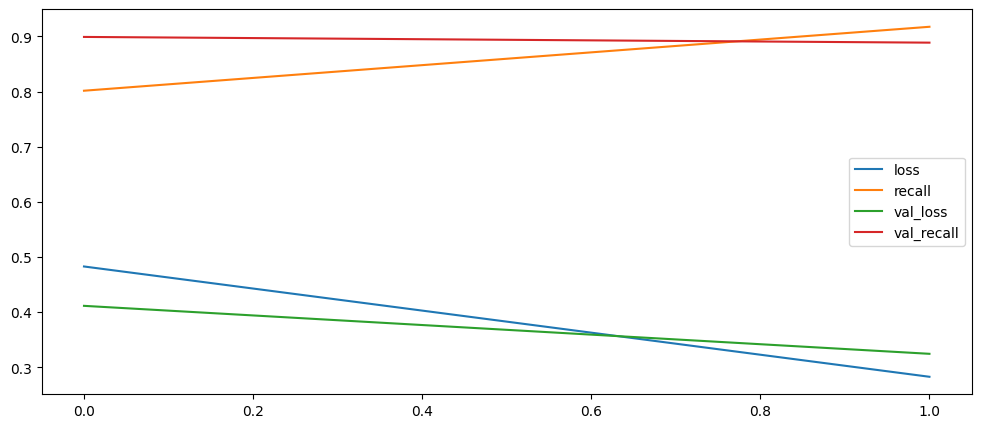

In [181]:
model_loss.plot()

In [182]:
model.evaluate(X_test_pad, y_test)

71/71 [==============================] - 2s 24ms/step - loss: 0.4241 - recall: 0.9244


[0.42410165071487427, 0.9243902564048767]

In [183]:
model.evaluate(X_train_pad, y_train)

573/573 [==============================] - 13s 23ms/step - loss: 0.3756 - recall: 0.9600


[0.3756207823753357, 0.9600484371185303]

In [184]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 2s 22ms/step
[[1409  445]
 [  31  379]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1854
           1       0.46      0.92      0.61       410

    accuracy                           0.79      2264
   macro avg       0.72      0.84      0.73      2264
weighted avg       0.88      0.79      0.81      2264



In [185]:
y_train_pred = model.predict(X_train_pad) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

573/573 [==============================] - 13s 23ms/step
[[11859  3170]
 [  132  3172]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     15029
           1       0.50      0.96      0.66      3304

    accuracy                           0.82     18333
   macro avg       0.74      0.87      0.77     18333
weighted avg       0.90      0.82      0.84     18333



71/71 [==============================] - 2s 25ms/step


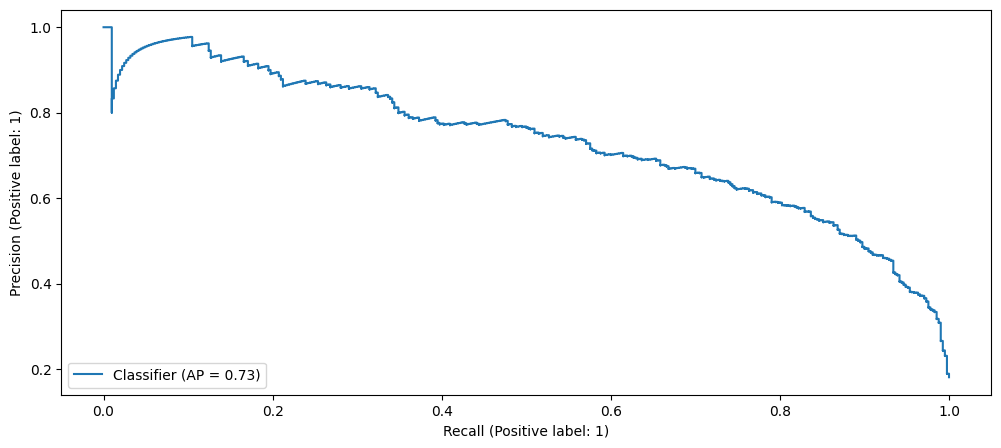

In [186]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [187]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.7327687176901099

In [188]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [189]:
df.head()

,text,is_recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [190]:
df.shape

(22634, 2)

### Allocation of TPU cores

In [191]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  #TPUClusterResolver is used to find the cluster where TPUs are located.
  print(f'Running on a TPU w/{tpu.num_accelerators()["TPU"]} cores')
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
# This line of code connects TensorFlow to the TPU cluster specified by the tpu object created earlier.
tf.tpu.experimental.initialize_tpu_system(tpu)
#This step initializes the TPU system and makes it ready for use.
tpu_strategy = tf.distribute.TPUStrategy(tpu)
#Accelerates training by distributing the model across multiple TPU cores.

Tensorflow version 2.15.0
Running on a TPU w/8 cores


### Read Data

In [192]:
X = df["text"].values
y = df["is_recommended"].map({1:0, 0:1}).values

### Train test split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

### Tokenization

In [194]:
# For every sentence...
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")

number_tokens_sentences = []
for sent in X_train:
    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(str(sent),
                                 add_special_tokens=True)

    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))

# We will only use tokenizer.encode() to find out how many tokens the longest comment consists of
# and to decide how many tokens to encode all comments/text into.

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

Max sentence length:  204


### Transformation Data to Dataset Format

In [195]:
#[{'text': '......', 'label': 0}]

In [196]:
train_text=[]
for i, j in zip(X_train, y_train):
  train_text.append({"text": str(i), "label":j})

test_text=[]
for i, j in zip(X_test, y_test):
  test_text.append({"text": str(i), "label":j})

In [197]:
train_text[0:2]

[{'text': 'The flower print really caught my eye. i like the unique twisted neckline. there is a lot of material here, but it hangs nicely without billowing out like some other unfortunate tops.',
  'label': 0},
 {'text': 'This light blouse is beautiful and true to size. i ordered the black one and love it!\ni would recommend this product',
  'label': 0}]

In [198]:
from datasets import Dataset
train_dataset = Dataset.from_list(train_text)
test_dataset = Dataset.from_list(test_text)

In [199]:
train_dataset[:2]

{'text': ['The flower print really caught my eye. i like the unique twisted neckline. there is a lot of material here, but it hangs nicely without billowing out like some other unfortunate tops.',
  'This light blouse is beautiful and true to size. i ordered the black one and love it!\ni would recommend this product'],
 'label': [0, 0]}

In [200]:
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 20370
})

### Fixing token counts of all documents

In [201]:
from transformers import AutoTokenizer
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")
def transformation(examples):
  seq=204
  tokenized_data = tokenizer(text=examples["text"],
                             return_tensors="np",
                             padding="max_length",
                             truncation=True,
                             max_length=seq,
                             add_special_tokens=True)
  return tokenized_data

train_tokenized_data = train_dataset.map(transformation, batched=True)
test_tokenized_data = test_dataset.map(transformation, batched=True)

Map:   0%|          | 0/20370 [00:00<?, ? examples/s]

Map:   0%|          | 0/2264 [00:00<?, ? examples/s]

In [202]:
train_tokenized_data

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 20370
})

In [203]:
test_tokenized_data

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2264
})

In [204]:
train_tokenized_data["input_ids"][:2]

[[2,
  3973,
  22069,
  9914,
  14683,
  1014,
  1011,
  9845,
  5420,
  6535,
  18694,
  1011,
  7972,
  3049,
  1028,
  18,
  51,
  26324,
  3973,
  2559,
  1023,
  12365,
  6197,
  25044,
  1039,
  7301,
  1021,
  4673,
  18,
  25138,
  1028,
  2578,
  43,
  22311,
  3434,
  8921,
  4471,
  1012,
  2156,
  1028,
  16,
  15414,
  3988,
  9992,
  1018,
  11701,
  5420,
  13051,
  20662,
  13697,
  8050,
  2874,
  11764,
  26324,
  7663,
  1028,
  2422,
  5439,
  2559,
  3158,
  12330,
  3743,
  2246,
  1018,
  18,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

### Create Optimizer

In [205]:
len(train_tokenized_data["input_ids"])//32   # number of iterations in an epoch

636

In [206]:
from transformers import create_optimizer

batch_size = 32 # 16
num_train_epochs = 2 # 2, 3, 4
num_train_steps = (len(train_tokenized_data["input_ids"]) // batch_size) * num_train_epochs    # In BERT model we create the optimizer ourselves
optimizer, lr_schedule = create_optimizer(
                                          init_lr=2e-5, #3e-5, 5e-5
                                          num_train_steps=num_train_steps,
                                          weight_decay_rate=0.01,
                                          num_warmup_steps=0.1)   # learning rate starts at 0 and gradually increases to 2e-5 until it reaches 10% of the total number of steps
                                                                  # The reason we do this is to prevent overfitting

In [207]:
optimizer

In [208]:
lr_schedule.get_config()

{'initial_learning_rate': 2e-05,
 'decay_schedule_fn': <tf_keras.src.optimizers.schedules.learning_rate_schedule.PolynomialDecay at 0x7934d86da5c0>,
 'warmup_steps': 0.1,
 'power': 1.0,
 'name': None}

In [209]:
optimizer.get_config()

{'name': 'AdamWeightDecay',
 'learning_rate': {'module': 'transformers.optimization_tf',
  'class_name': 'WarmUp',
  'config': {'initial_learning_rate': 2e-05,
   'decay_schedule_fn': {'module': 'keras.optimizers.schedules',
    'class_name': 'PolynomialDecay',
    'config': {'initial_learning_rate': 2e-05,
     'decay_steps': 1271.9,
     'end_learning_rate': 0.0,
     'power': 1.0,
     'cycle': False,
     'name': None},
    'registered_name': None},
   'warmup_steps': 0.1,
   'power': 1.0,
   'name': None},
  'registered_name': 'WarmUp'},
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'amsgrad': False,
 'weight_decay_rate': 0.01}

### Creating Model with TPU

In [210]:
with tpu_strategy.scope():

    from transformers import TFAutoModelForSequenceClassification

    #from tensorflow.keras.optimizers import AdamW
    #from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy

    # Load and compile our model
    model = TFAutoModelForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-uncased",
                                                                 num_labels=2)
    #loss=CategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.ReductionV2.NONE
    # loss= SparseCategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.ReductionV2.NONE)


    model.compile(optimizer=optimizer, metrics=["accuracy"])  # No loss argument!

tf_model.h5:   0%|          | 0.00/545M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Transformation Dataset to TF_dataset Fromat

In [211]:
tf_dataset_train = model.prepare_tf_dataset(train_tokenized_data, batch_size=32, shuffle=False)   # we convert datasets to tensorflow tensors
tf_dataset_test = model.prepare_tf_dataset(test_tokenized_data, batch_size=32, shuffle=False)

In [212]:
tf_dataset_train

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 204), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 204), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 204), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [213]:
tf_dataset_test

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 204), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 204), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 204), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

### Model Fiting

In [214]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weight_dict = dict(enumerate(class_weights))

In [215]:
model.fit(tf_dataset_train,
          validation_data=(tf_dataset_test),
          epochs=num_train_epochs,
          class_weight=class_weight_dict
         )

Epoch 1/2


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
637/637 [==============================] - 265s 222ms/step - loss: 0.4261 - accuracy: 0.7717 - val_loss: 0.2799 - val_accuracy: 0.8759
Epoch 2/2
637/637 [==============================] - 71s 112ms/step - loss: 0.2632 - accuracy: 0.8751 - val_loss: 0.2985 - val_accuracy: 0.8737


In [216]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  110617344 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 110618882 (421.98 MB)
Trainable params: 110618882 (421.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model evaluation

In [217]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.426094,0.771674,0.279859,0.875883
1,0.263151,0.875061,0.298468,0.873675


<Axes: >

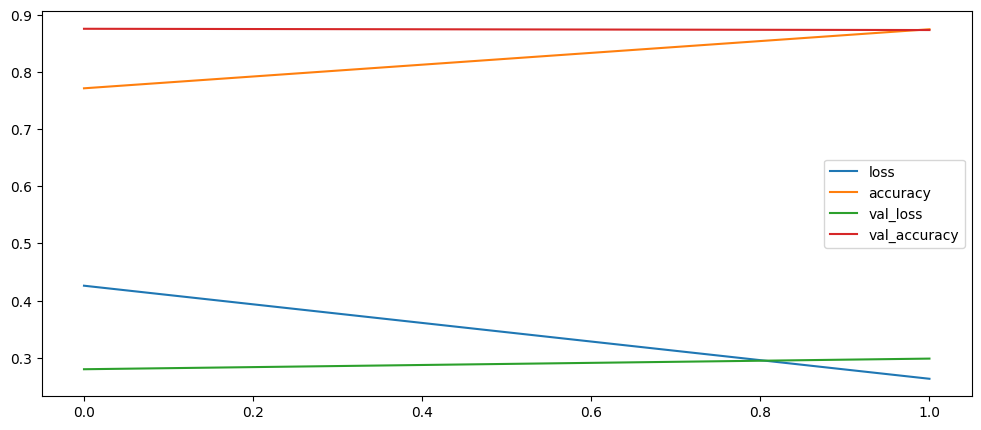

In [218]:
model_loss.plot()

In [219]:
logits= model.predict(tf_dataset_test)
logits

71/71 [==============================] - 26s 122ms/step


TFSequenceClassifierOutput(loss=None, logits=array([[ 2.3839805 , -2.6329846 ],
       [ 2.3251612 , -2.5558252 ],
       [ 2.628051  , -2.956875  ],
       ...,
       [ 0.19357568, -0.17854172],
       [ 1.1576376 , -1.4794487 ],
       [ 2.1166391 , -2.0928578 ]], dtype=float32), hidden_states=None, attentions=None)

In [220]:
logits.logits

array([[ 2.3839805 , -2.6329846 ],
       [ 2.3251612 , -2.5558252 ],
       [ 2.628051  , -2.956875  ],
       ...,
       [ 0.19357568, -0.17854172],
       [ 1.1576376 , -1.4794487 ],
       [ 2.1166391 , -2.0928578 ]], dtype=float32)

In [221]:
logits.logits[0]

array([ 2.3839805, -2.6329846], dtype=float32)

In [222]:
import tensorflow as tf

probabilities = tf.nn.softmax(logits.logits, axis=-1).numpy()

probabilities

array([[0.9934191 , 0.00658101],
       [0.9924676 , 0.00753236],
       [0.99626   , 0.00373999],
       ...,
       [0.5919705 , 0.40802947],
       [0.9332106 , 0.06678941],
       [0.98536354, 0.01463643]], dtype=float32)

In [223]:
y_pred=np.argmax(probabilities, axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [224]:
def classification(tokenized_data):
  import tensorflow as tf
  import numpy as np

  logits= model.predict(tokenized_data)
  probabilities = tf.nn.softmax(logits.logits, axis=-1).numpy()
  y_pred = np.argmax(probabilities, axis=1)
  return y_pred

In [225]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=classification(tf_dataset_test)
print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 29ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1854
           1       0.60      0.90      0.72       410

    accuracy                           0.87      2264
   macro avg       0.79      0.88      0.82      2264
weighted avg       0.91      0.87      0.88      2264



In [226]:
y_train_pred=classification(tf_dataset_train)
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 19s 29ms/step
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     16680
           1       0.66      0.96      0.78      3690

    accuracy                           0.90     20370
   macro avg       0.83      0.93      0.86     20370
weighted avg       0.93      0.90      0.91     20370



71/71 [==============================] - 3s 29ms/step


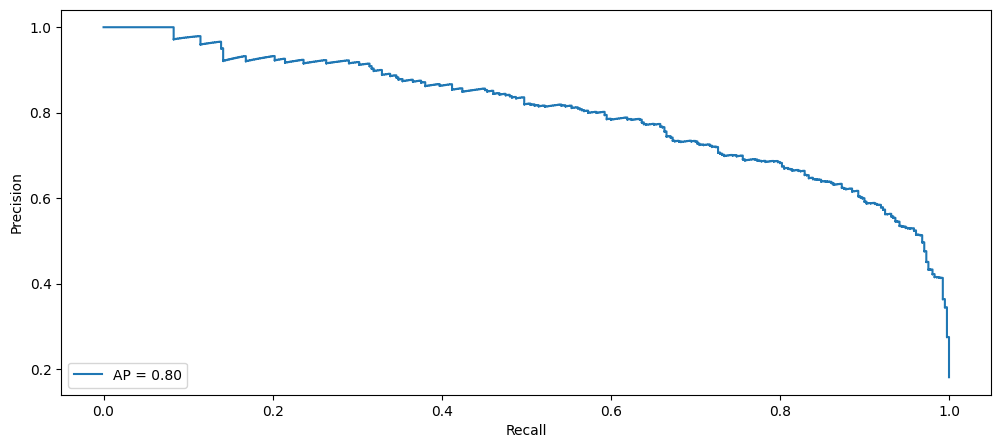

In [227]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score

def classification_probabilities(tokenized_data):
    logits = model.predict(tokenized_data)
    probabilities = tf.nn.sigmoid(logits.logits).numpy()
    return probabilities

def classification_probabilities(tokenized_data):
    logits = model.predict(tokenized_data)
    probabilities = tf.nn.sigmoid(logits.logits).numpy()
    return probabilities

# Test seti için olasılıkları al
y_test_prob = classification_probabilities(tf_dataset_test)

# y_test_prob 2D olduğundan, sadece pozitif sınıfın olasılığını alıyoruz
y_test_prob = y_test_prob[:, 1]  # 1. sınıfın (pozitif) olasılıklarını seçiyoruz

# Precision-Recall eğrisi ve AP skorunu hesapla
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
ap_score = average_precision_score(y_test, y_test_prob)

# Eğriyi çiz
disp = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=ap_score)
disp.plot()

In [228]:
BERT_AP = average_precision_score(y_test, y_test_prob)
BERT_f1 = f1_score(y_test, y_pred)
BERT_rec = recall_score(y_test, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [229]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count","NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf","DL", "BERT"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec
                                         ],

                        "Average_Precision_Score": [nb_count_AP, log_count_AP, svc_count_AP, rf_count_AP, ada_count_AP, nb_tfidf_AP,
                                                    log_tfidf_AP, svc_tfidf_AP, rf_tfidf_AP, ada_tfidf_AP, DL_AP, BERT_AP
                                                ]})

compare

,Model,F1_Score,Recall_Score,Average_Precision_Score
0,NaiveBayes_count,0.678800,0.841463,0.699149
1,LogReg_count,0.661891,0.845122,0.694280
2,SVM_count,0.674769,0.846341,0.708826
3,Random Forest_count,0.647619,0.829268,0.653948
4,AdaBoost_count,0.650319,0.808537,0.681213
5,NaiveBayes_tfidf,0.678800,0.841463,0.699149
6,LogReg_tfidf,0.689349,0.852439,0.742635
7,SVM_tfidf,0.691272,0.845122,0.747619
8,Random Forest_tfidf,0.621198,0.821951,0.645886
9,AdaBoost_tfidf,0.644371,0.834146,0.689648


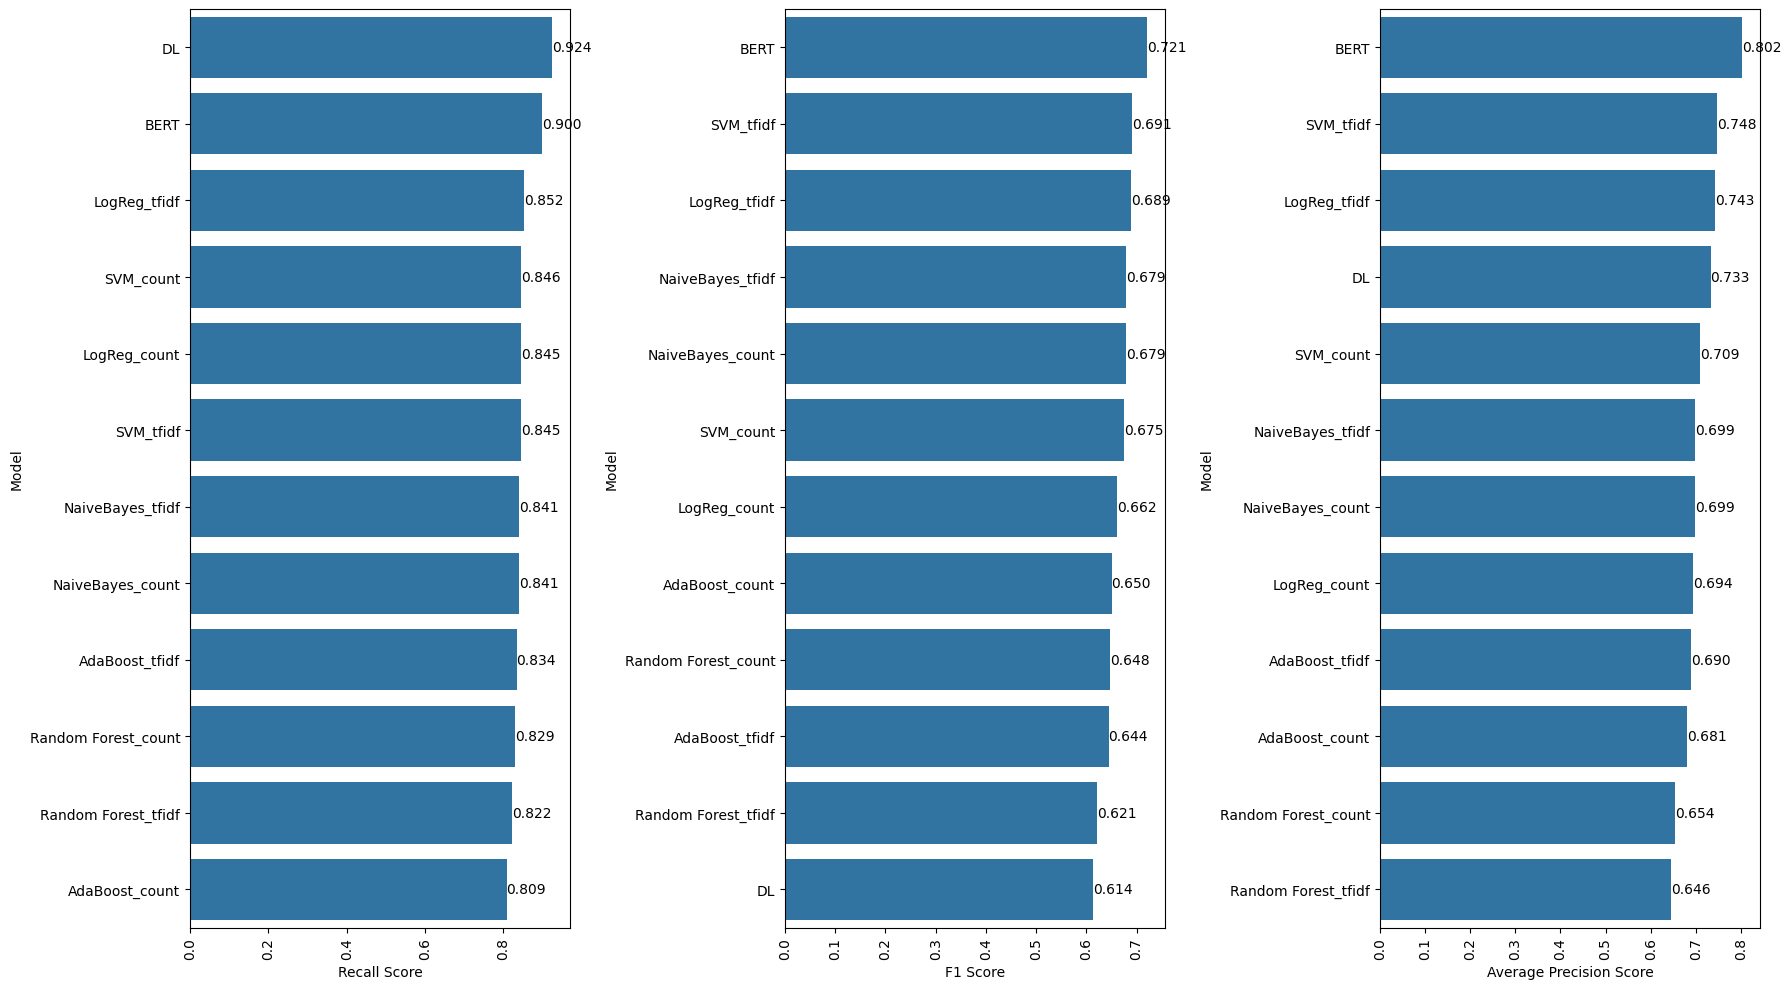

In [230]:
plt.figure(figsize=(18, 10))

plt.subplot(131)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax = sns.barplot(x="Recall_Score", y="Model", data=compare)
ax.set_xlabel("Recall Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(132)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax = sns.barplot(x="F1_Score", y="Model", data=compare)
ax.set_xlabel("F1 Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(133)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.barplot(x="Average_Precision_Score", y="Model", data=compare)
ax.set_xlabel("Average Precision Score")
ax.set_ylabel("Model")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.tight_layout()
plt.show()

### Conclusion

In [231]:
# We choose BERT as the final model because it has the highest average_precision_score and f1_score.
# The average_precision_score of the DL model is 0.768996 while the average_precision_score of the BERT model is 0.793768.
# The f1_score of the DL model is 0.675373 while the f1_score of the BERT model is 0.718000.
# Looking at the recall values, the DL model ranks first (0.882927) and the Bert model ranks second (0.875610), but the difference is very small.
# Also, when we look at the precision, recall and f1 values of the test and train data in the BERT and DL model,
# we see that the variance is less in the BERT model.

In [232]:
model.save_pretrained("./BERT_model")

In [233]:
with tpu_strategy.scope():
  loaded_model = TFAutoModelForSequenceClassification.from_pretrained("/content/BERT_model")

Some layers from the model checkpoint at /content/BERT_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/BERT_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [234]:
women_clothing_review = [
    "The dress caught my eye instantly with its vibrant colors and elegant design, but upon receiving it,\
     I was disappointed to find that the fabric was much thinner than expected, and the stitching seemed rather fragile,\
     making me question its durability despite its stylish appearance.",
]

In [235]:
samples=[]
for i in [women_clothing_review]:
  samples.append({"text": str(i)})

In [236]:
def prep_data(samples, model):
  from datasets import Dataset
  samples_dataset = Dataset.from_list(samples)
  samples_tokenized_data = samples_dataset.map(transformation, batched=True)
  tf_dataset_samples = model.prepare_tf_dataset(samples_tokenized_data , batch_size=32, shuffle=False)
  return tf_dataset_samples

In [237]:
tf_dataset_samples=prep_data(samples, loaded_model)

Map:   0%|          | 0/1 [00:00<?, ? examples/s]

In [238]:
logits=loaded_model.predict(tf_dataset_samples)
logits

1/1 [==============================] - 17s 17s/step


TFSequenceClassifierOutput(loss=None, logits=array([[-1.2842264,  1.2412062]], dtype=float32), hidden_states=None, attentions=None)

In [239]:
probs= tf.nn.softmax(logits.logits, axis=-1).numpy()
probs

array([[0.07409438, 0.92590564]], dtype=float32)

In [240]:
y_pred = np.argmax(probs, axis=1)
y_pred

array([1])

In [241]:
classification(tf_dataset_samples)

1/1 [==============================] - 17s 17s/step


array([1])

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___